https://stackoverflow.com/questions/43355044/cumulative-explained-variance-for-pca-in-python

https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

https://stackoverflow.com/questions/23294616/how-to-use-scikit-learn-pca-for-features-reduction-and-know-which-features-are-d

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

## imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import time
from math import sqrt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVR,SVC
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from rgf.sklearn import RGFClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

## Functions

In [41]:
def execution_time_calculator(start_time):
    delta = time.time() - start_time
    print("--- %s seconds ---" % (delta))
    

# def df_clean(df):
#     df["date"] = df["date"].apply(time_to_standard)
#     df = df.drop_duplicates(subset=['date'])
    
#     dropped_df = df.dropna(axis=1).dropna().drop(['unix', 'symbol'], axis=1)
    
    
#     return dropped_df


def plot_train_data(df):
    plt.figure(figsize=(30,10))
    plt.plot(df.index, df['Age'])
    
    #plt.title('Price chart (close) ' + str(ticker))
    plt.show()
    return None


def df_clean(df,mode=0,pre_found_age_value=0):
    if mode==0:
        age_mean = df.mean(axis=0)[3]
    elif mode==1:
        age_mean = pre_found_age_value
    
    values = {"Age": age_mean, "Cabin": "-", "Embarked": "-","Pclass":0,"Sex":"male","SibSp":0,"Parch":0,"Ticket":"-","Fare":0}
    df = df.fillna(value=values)
    # df = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked", "Survived"]]
    if mode==0:
#         df = df
        df = df[['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Cabin", "Embarked", "Survived"]]
    elif mode==1:
        df = df[['Pclass', 'Sex', 'Age', "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]

    return df,age_mean

def df_encoder(df,mode=0,LEs=None):
    if mode==0:
        LE_Sex = LabelEncoder()
        LE_Cabin = LabelEncoder()
        LE_Embarked = LabelEncoder()
    elif mode==1:
        LE_Sex = LEs[0]
        LE_Cabin = LEs[0]
        LE_Embarked = LEs[0]
    
    df['Sex'] = LE_Sex.fit_transform(df['Sex'])
    df['Cabin'] = LE_Cabin.fit_transform(df['Cabin'])
    df['Embarked'] = LE_Embarked.fit_transform(df['Embarked'])
    
    return df, LE_Sex, LE_Cabin, LE_Embarked


def metrics_calculator(real,pred,mode):
    print("********",mode,"********",":")
    metrics_lists=[metrics.accuracy_score,metrics.f1_score,metrics.precision_score,metrics.recall_score,metrics.average_precision_score,metrics.roc_auc_score,metrics.mean_squared_error,metrics.mean_squared_error]
    metric_names=["Accuracy","F1","Precision","Recall","AP","RoC_AuC","MSE"]
    for metric in range(len(metrics_lists)):
        if metric== len(metrics_lists)-1:
            metric_value = metrics_lists[metric](real, pred)
            print("{:20}".format("{}: ".format("RMSE")),sqrt(metric_value))
        else:  
            metric_value = metrics_lists[metric](real, pred)
            print("{:20}".format("{}: ".format(metric_names[metric])),metric_value)
        
#     report = classification_report(real, pred)
#     print(report)


    
def all_models_test(df,models,models_name,x_train,y_train):

    classifiers = []
    for i in range(len(models)):
        print("--------",models_name[i],"--------")
        clf = models[i].fit(x_train, y_train)
        y_pred_train = clf.predict(x_train)
        metrics_calculator(y_pred_train,y_train,"train")
        classifiers.append(clf)
    return classifiers

## Read and clean train data

In [3]:
df = pd.read_csv("./data/train.csv")#,skiprows=1)#.iloc[::-1].reset_index().drop(["index"], axis=1)

In [4]:
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df,age_mean = df_clean(df)

C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [6]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,-,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,-,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,-,S,0


## some info about data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

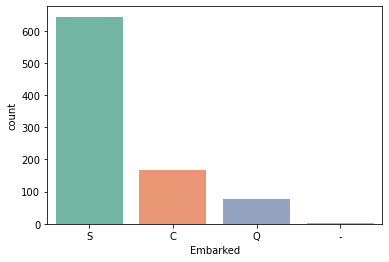

In [8]:
# df["Cabin"].unique()
# df["Cabin"].describe()
# df["Cabin"].value_counts()
# df['Embarked'].value_counts().idxmax()

sns.countplot(x='Embarked',data=df,palette='Set2')

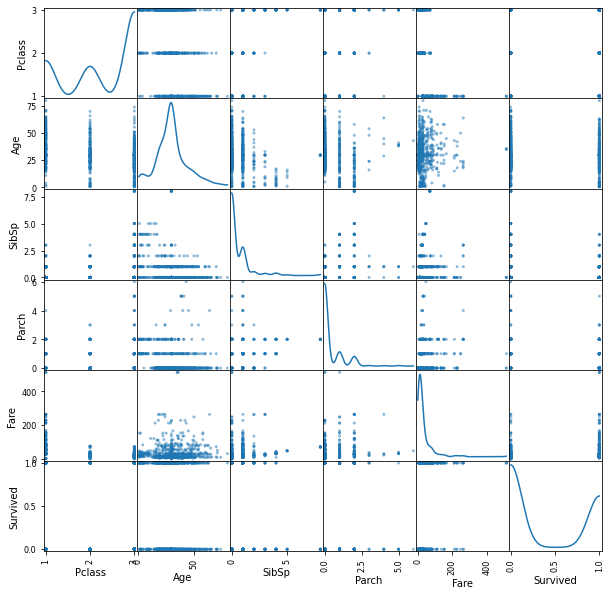

In [9]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(10, 10));

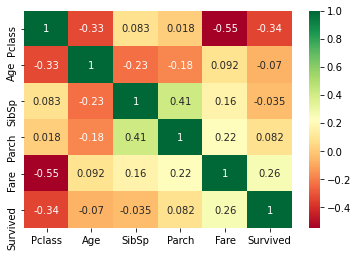

In [10]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn");

## Encode categorical data

In [11]:
df, LE_Sex, LE_Cabin, LE_Embarked = df_encoder(df)


# pandas encoding - not good when we want to apply on test data

# df['Sex'] = df['Sex'].astype('category')
# df['Cabin'] = df['Cabin'].astype('category')
# df['Embarked'] = df['Embarked'].astype('category')
# OneHotEncoder().fit_transform(df)
# cat_columns = df.select_dtypes(['category']).columns
# df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [12]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,3,0
1,1,0,38.0,1,0,71.2833,82,1,1
2,3,0,26.0,0,0,7.9250,0,3,1
3,1,0,35.0,1,0,53.1000,56,3,1
4,3,1,35.0,0,0,8.0500,0,3,0


In [13]:
# df.info()

In [14]:
array = df.values
X = array[:,:-1]
Y = array[:,-1]

## PCA

In [15]:
pca = PCA(n_components=6)
fit = pca.fit(X)
# summarize components
explained_variance_ratio=fit.explained_variance_ratio_

print(explained_variance_ratio)
print(len(explained_variance_ratio))
print(sum(explained_variance_ratio))
x_pca_train = pca.transform(X)
y_train = Y
x_train = X

[6.69591682e-01 2.89634969e-01 4.00730257e-02 3.10136191e-04
 1.45071161e-04 1.14935589e-04]
6
0.9998698193599477


## Classifiers

In [42]:
BNB = BernoulliNB()
GNB = GaussianNB()
RF = RandomForestClassifier()
DTree = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
LR = LogisticRegression()
MLP = make_pipeline(MinMaxScaler(), MLPClassifier(random_state=0, shuffle=False))
XGB = xgb.XGBClassifier(eval_metric='mlogloss')
SVC_auto = make_pipeline(MinMaxScaler(), SVC(gamma="auto"))
RGF = RGFClassifier()
Bagging = BaggingClassifier(random_state=0)
estimators = [
   ('xgb', xgb.XGBClassifier(eval_metric='mlogloss')),
   ('lr', LogisticRegression()),
   ('nb', BernoulliNB()),
   ('rgf', RGFClassifier()),
   ('svm', make_pipeline(StandardScaler(), SVC(gamma="auto"))),
   ('mlp', make_pipeline(StandardScaler(), MLPClassifier(random_state=0, shuffle=False))),
]
Voting = VotingClassifier(estimators)
Stacking = StackingClassifier(estimators, LogisticRegression())
custom_RF=RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=6, min_samples_leaf=6, warm_start=True)

models = [BNB,GNB,RF,custom_RF,DTree,KNN,LR,MLP,XGB,SVC_auto,RGF,Bagging,Voting,Stacking]
models_name = ["BNB","GNB","RF","custom_RF","DTree","KNN","LR","MLP","XGB","SVC_auto","RGF","Bagging","Voting","Stacking"]


In [43]:
start_time = time.time()

classifiers = all_models_test(df,models[:],models_name,x_train,y_train)

execution_time_calculator(start_time)

-------- BNB --------
******** train ******** :
Accuracy:            0.7856341189674523
F1:                  0.7203513909224013
Precision:           0.7192982456140351
Recall:              0.7214076246334311
AP:                  0.6255290120598553
RoC_AuC:             0.7734310850439883
MSE:                 0.2143658810325477
RMSE:                0.46299663177235717
-------- GNB --------
******** train ******** :
Accuracy:            0.7991021324354658
F1:                  0.7316341829085456
Precision:           0.7134502923976608
Recall:              0.7507692307692307
AP:                  0.6265456181245654
RoC_AuC:             0.7888121772220713
MSE:                 0.20089786756453423
RMSE:                0.44821631782492505
-------- RF --------
******** train ******** :
Accuracy:            0.9865319865319865
F1:                  0.9823008849557523
Precision:           0.9736842105263158
Recall:              0.9910714285714286
AP:                  0.9683576048707628
RoC_AuC:      

C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


******** train ******** :
Accuracy:            0.8338945005611672
F1:                  0.768025078369906
Precision:           0.716374269005848
Recall:              0.8277027027027027
AP:                  0.6501839758418706
RoC_AuC:             0.8323387463093346
MSE:                 0.16610549943883277
RMSE:                0.4075604242794346
-------- XGB --------


C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


******** train ******** :
Accuracy:            0.9719416386083053
F1:                  0.9625187406296851
Precision:           0.9385964912280702
Recall:              0.9876923076923076
AP:                  0.9315338722356266
RoC_AuC:             0.9752949170970371
MSE:                 0.028058361391694726
RMSE:                0.167506302543202
-------- SVC_auto --------
******** train ******** :
Accuracy:            0.7867564534231201
F1:                  0.7103658536585367
Precision:           0.6812865497076024
Recall:              0.7420382165605095
AP:                  0.5964497472207831
RoC_AuC:             0.7765650354899601
MSE:                 0.2132435465768799
RMSE:                0.46178300810757417
-------- RGF --------
******** train ******** :
Accuracy:            0.9012345679012346
F1:                  0.8646153846153847
Precision:           0.8216374269005848
Recall:              0.9123376623376623
AP:                  0.7799137996506418
RoC_AuC:             0.90385322

C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and inc

******** train ******** :
Accuracy:            0.8686868686868687
F1:                  0.815748031496063
Precision:           0.7573099415204678
Recall:              0.8839590443686007
AP:                  0.7075903436899784
RoC_AuC:             0.8725815288732636
MSE:                 0.13131313131313133
RMSE:                0.36237153766973934
-------- Stacking --------


C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Tohid\anaconda\envs\pattern7\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=

******** train ******** :
Accuracy:            0.9113355780022446
F1:                  0.8782742681047765
Precision:           0.8333333333333334
Recall:              0.9283387622149837
AP:                  0.7983069932038445
RoC_AuC:             0.9153680112444782
MSE:                 0.08866442199775533
RMSE:                0.2977657166259328
--- 18.94599986076355 seconds ---


## Load test data

In [69]:
df_test = pd.read_csv("./data/test.csv")
ids_col = df_test["PassengerId"].values
df_test,_ = df_clean(df_test,1,age_mean)
df_test,_,_,_ = df_encoder(df_test,1,[LE_Sex, LE_Cabin, LE_Embarked])

array_test = df_test.values
x_test = array_test[:,]

In [70]:
# df_test.info()
# df_test

In [75]:
def predict_one_classifier(classifier,labels_col,x_test):
    y_pred_test = classifier.predict(x_test)
#     metrics_calculator(labels_col,y_pred_test,"test")
    return y_pred_test

def predic_with_all_classifiers(classifiers,labels_col,x_test):
    for i in range(len(classifiers)):
        predict_one_classifier(classifiers[i],labels_col,x_test)

In [76]:
# predic_with_all_classifiers(classifiers,labels_col,x_test)
y_pred_test = predict_one_classifier(classifiers[9],labels_col,x_test)

In [77]:
df_result = pd.DataFrame(list(zip(list(ids_col),list(y_pred_test))), columns =['PassengerId','Survived'])
df_result['Survived'] = df_result['Survived'].astype('int64')

In [67]:
# df_result

In [68]:
# compression_opts = dict(method='zip',archive_name='out.csv')  

df_result.to_csv('out.csv', index=False)  